         danceability    energy       key   loudness  ...  liveness   valence       tempo    duration_ms
cluster                                               ...                                               
0            0.557604  0.800281  5.051856  -5.290268  ...  0.236227  0.421505  132.304514  226715.146670
1            0.660854  0.785268  5.372369  -6.950474  ...  0.190721  0.389274  125.169831  251498.791427
2            0.606081  0.435859  5.206858 -10.394249  ...  0.157904  0.398256  113.069409  226233.456104
3            0.750985  0.701313  5.699819  -6.414381  ...  0.165328  0.648679  113.855399  220022.651505

[4 rows x 12 columns]


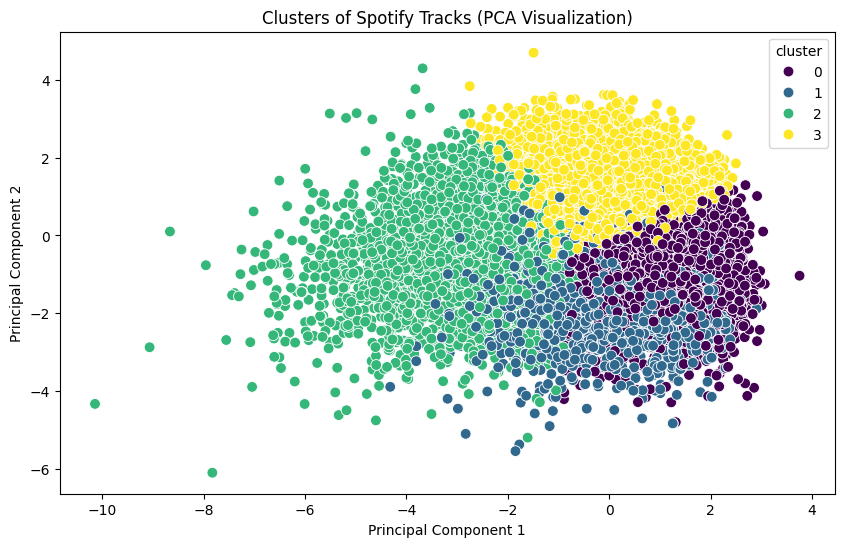

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
km=KMeans(n_clusters=4,random_state=42)
spotify=pd.read_csv('/content/spotify dataset.csv',delimiter=',')
spotify.head()
feature=spotify[['danceability', 'energy', 'key', 'loudness', 'mode',
                      'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms']]
scale=StandardScaler()
scaled=scale.fit_transform(feature)
k=km.fit_predict(scaled)
spotify['cluster'] = k
cluster_summary = spotify.groupby('cluster')[['danceability', 'energy', 'key', 'loudness', 'mode',
                                                'speechiness', 'acousticness', 'instrumentalness',
                                                'liveness', 'valence', 'tempo', 'duration_ms']].mean()
print(cluster_summary)

pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=spotify['cluster'], palette='viridis', s=60)
plt.title("Clusters of Spotify Tracks (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()